In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [64]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
defaulter_df = pd.read_csv("cancer patient data sets.csv")
defaulter_df.head()


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
print("Size of the data : ", defaulter_df.shape)


Size of the data :  (1000, 26)


In [95]:
print("Target variable frequency distribution : \n", defaulter_df["Genetic Risk"].value_counts())

Target variable frequency distribution : 
 7    327
2    212
3    173
6    108
5    100
4     40
1     40
Name: Genetic Risk, dtype: int64


In [14]:
print("Target variable frequency distribution : \n", defaulter_df["Gender"].value_counts())

Target variable frequency distribution : 
 1    598
2    402
Name: Gender, dtype: int64


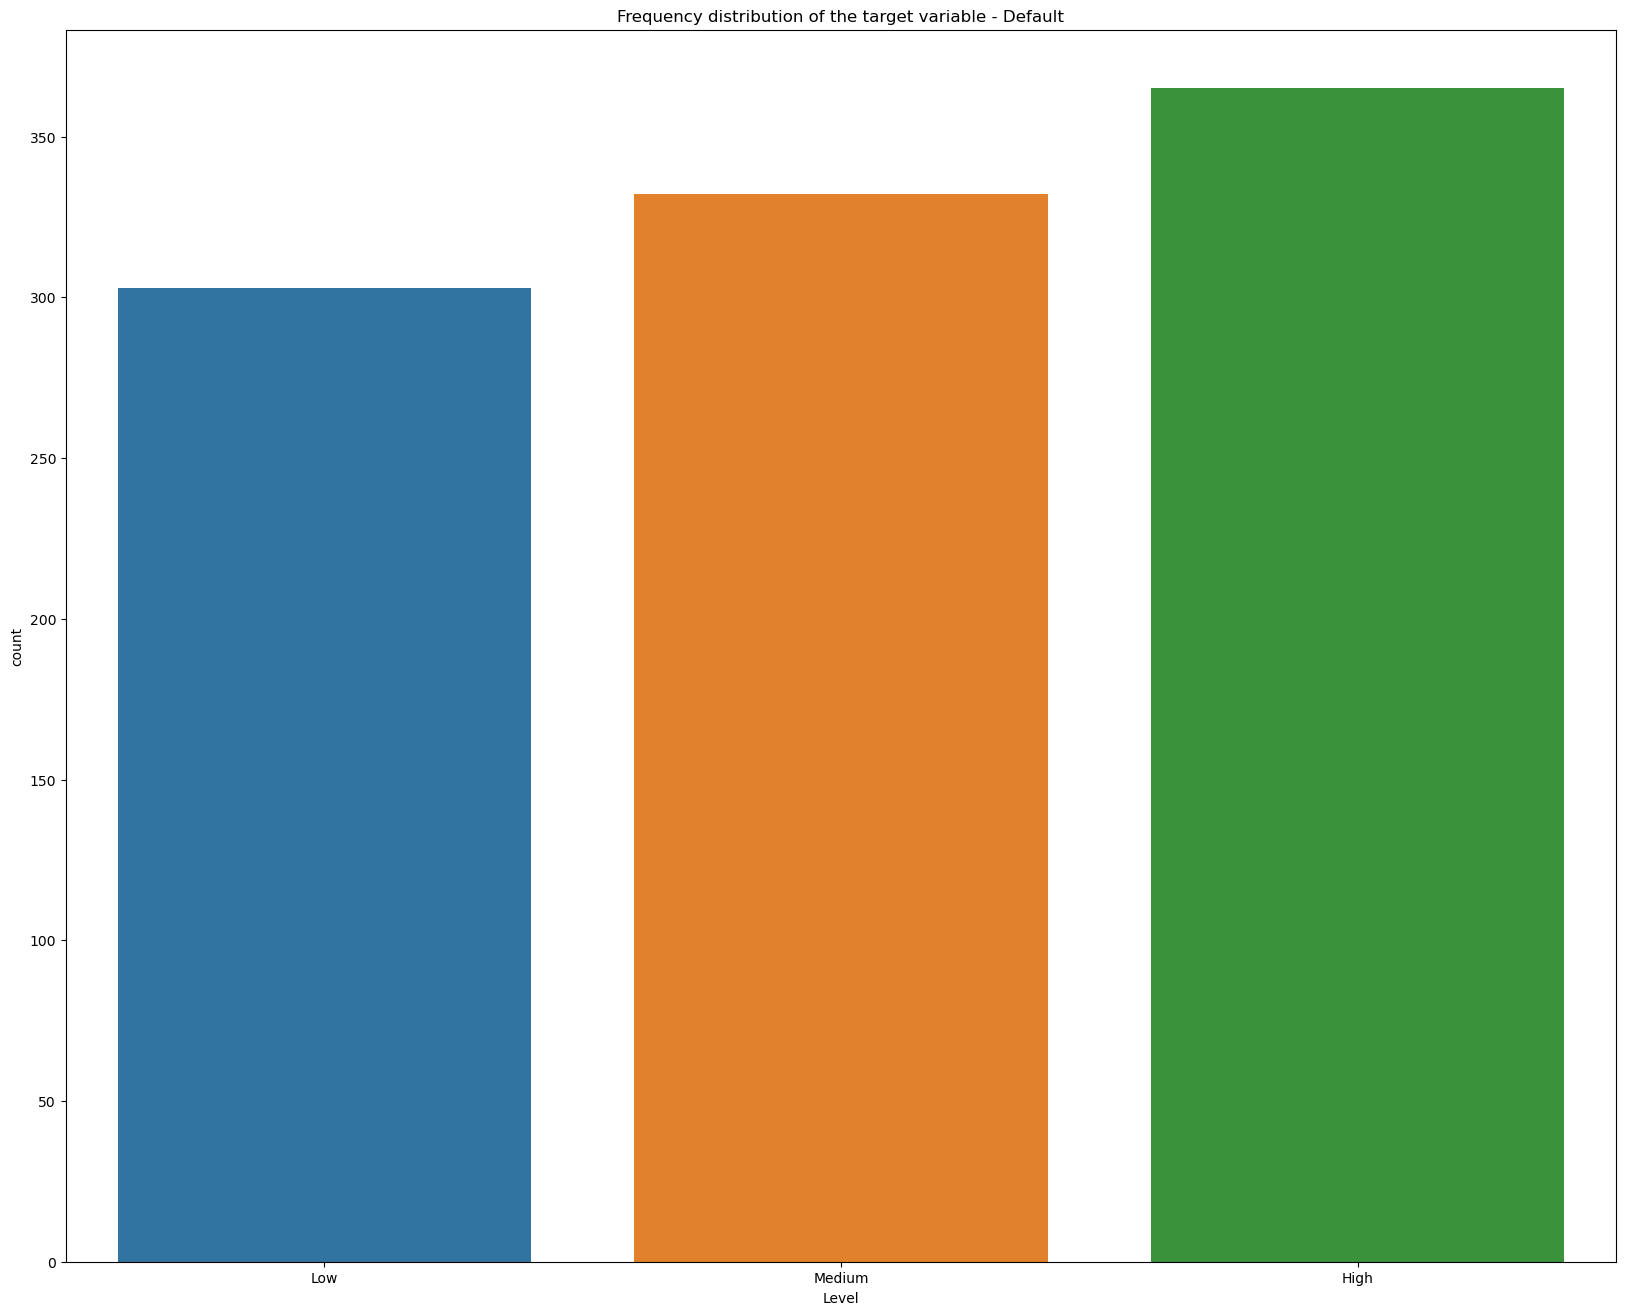

In [71]:
plt.figure(figsize = (20.0,16.0))
sns.countplot(defaulter_df['Level'])
plt.title("Frequency distribution of the target variable - Default")
plt.show()


In [97]:
X = defaulter_df[["Air Pollution", "Alcohol use","Dust Allergy","OccuPational Hazards","Genetic Risk","chronic Lung Disease","Fatigue","Weight Loss","Shortness of Breath","Wheezing","Swallowing Difficulty","Clubbing of Finger Nails","Frequent Cold","Dry Cough","Snoring"]]
y = defaulter_df["Level"]


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [100]:
print("Size of training data : ", X_train.shape[0])
print("Size of test data : ", X_test.shape[0])

Size of training data :  800
Size of test data :  200


In [ ]:
#NORMALIZATION**********************************

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
min_max = MinMaxScaler()
min_max.fit(X_train)
train_transformed = min_max.transform(X_train)
transformed = min_max.transform(X_test)
transformed

array([[0.        , 0.71428571, 0.85714286, ..., 0.        , 0.16666667,
        0.        ],
       [0.71428571, 1.        , 0.85714286, ..., 0.33333333, 0.5       ,
        0.16666667],
       [0.71428571, 1.        , 0.85714286, ..., 0.33333333, 0.5       ,
        0.16666667],
       ...,
       [0.71428571, 0.85714286, 0.85714286, ..., 0.5       , 0.66666667,
        0.33333333],
       [0.14285714, 0.28571429, 0.14285714, ..., 0.33333333, 0.16666667,
        0.33333333],
       [0.        , 0.71428571, 0.85714286, ..., 1.        , 1.        ,
        0.66666667]])

In [160]:
X_train["Air Pollution_normalized"] = train_transformed[:,0]
X_train["Alcohol use_normalized"] = train_transformed[:,1]
X_train["Dust Allergy_normalized"] = train_transformed[:,2]
X_train["OccuPational Hazards_normalized"] = train_transformed[:,3]
X_train["Genetic Risk_normalized"] = train_transformed[:,4]
X_train["chronic Lung Disease_normalized"] = train_transformed[:,5]
X_train["Fatigue_normalized"] = train_transformed[:,6]
X_train["Weight Loss_normalized"] = train_transformed[:,7]
X_train["Shortness of Breath_normalized"] = train_transformed[:,8]
X_train["Wheezing_normalized"] = train_transformed[:,9]
X_train["Swallowing Difficulty_normalized"] =train_transformed[:,10]
X_train["Clubbing of Finger Nails_normalized"] = train_transformed[:,11]
X_train["Frequent Cold_normalized"] = train_transformed[:,12]
X_train["Dry Cough_normalized"] = train_transformed[:,13]
X_train["Snoring_normalized"] = train_transformed[:,14]
X_train.head()

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Fatigue,Weight Loss,Shortness of Breath,Wheezing,...,chronic Lung Disease_normalized,Fatigue_normalized,Weight Loss_normalized,Shortness of Breath_normalized,Wheezing_normalized,Swallowing Difficulty_normalized,Clubbing of Finger Nails_normalized,Frequent Cold_normalized,Dry Cough_normalized,Snoring_normalized
29,1,6,7,5,3,2,3,3,7,7,...,0.166667,0.250,0.285714,0.750,0.857143,0.428571,0.875,1.000000,1.000000,0.666667
535,6,8,7,7,6,7,5,2,5,2,...,1.000000,0.500,0.142857,0.500,0.142857,0.285714,0.125,0.000000,1.000000,0.833333
695,1,6,7,5,3,2,3,3,7,7,...,0.166667,0.250,0.285714,0.750,0.857143,0.428571,0.875,1.000000,1.000000,0.666667
557,6,8,7,7,7,6,2,7,6,5,...,0.833333,0.125,0.857143,0.625,0.571429,0.000000,1.000,0.333333,0.500000,0.166667
836,2,3,5,2,1,1,2,1,3,4,...,0.000000,0.125,0.000000,0.250,0.428571,0.714286,0.000,0.333333,0.166667,0.166667


In [104]:
print("Size of the data : ", defaulter_df.shape)

Size of the data :  (1000, 26)


In [106]:
X_test["Air Pollution_normalized"] = transformed[:,0]
X_test["Alcohol use_normalized"] = transformed[:,1]
X_test["Dust Allergy_normalized"] = transformed[:,2]
X_test["OccuPational Hazards_normalized"] = transformed[:,3]
X_test["Genetic Risk_normalized"] = transformed[:,4]
X_test["chronic Lung Disease_normalized"] = transformed[:,5]
X_test["Fatigue_normalized"] = transformed[:,6]
X_test["Weight Loss_normalized"] = transformed[:,7]
X_test["Shortness of Breath_normalized"] = transformed[:,8]
X_test["Wheezing_normalized"] = transformed[:,9]
X_test["Swallowing Difficulty_normalized"] = transformed[:,10]
X_test["Clubbing of Finger Nails_normalized"] = transformed[:,11]
X_test["Frequent Cold_normalized"] = transformed[:,12]
X_test["Dry Cough_normalized"] = transformed[:,13]
X_test["Snoring_normalized"] = transformed[:,14]

X_test.head()

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Fatigue,Weight Loss,Shortness of Breath,Wheezing,...,chronic Lung Disease_normalized,Fatigue_normalized,Weight Loss_normalized,Shortness of Breath_normalized,Wheezing_normalized,Swallowing Difficulty_normalized,Clubbing of Finger Nails_normalized,Frequent Cold_normalized,Dry Cough_normalized,Snoring_normalized
521,1,6,7,8,7,6,3,2,6,4,...,0.833333,0.250,0.142857,0.625,0.428571,0.142857,0.250,0.000000,0.166667,0.000000
737,6,8,7,7,7,6,2,7,6,5,...,0.833333,0.125,0.857143,0.625,0.571429,0.000000,1.000,0.333333,0.500000,0.166667
740,6,8,7,7,7,6,2,7,6,5,...,0.833333,0.125,0.857143,0.625,0.571429,0.000000,1.000,0.333333,0.500000,0.166667
660,7,7,7,7,6,7,4,2,3,1,...,1.000000,0.375,0.142857,0.250,0.000000,0.428571,0.500,0.833333,1.000000,0.666667
411,1,6,7,5,3,2,3,3,7,7,...,0.166667,0.250,0.285714,0.750,0.857143,0.428571,0.875,1.000000,1.000000,0.666667


In [107]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [109]:
#NON-NORMALIZED VALUE
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train[["Air Pollution", "Alcohol use","Dust Allergy","OccuPational Hazards","Genetic Risk","chronic Lung Disease","Fatigue","Weight Loss","Shortness of Breath","Wheezing","Swallowing Difficulty","Clubbing of Finger Nails","Frequent Cold","Dry Cough","Snoring"]], y_train)
predictions = knn.predict(X_test[["Air Pollution", "Alcohol use","Dust Allergy","OccuPational Hazards","Genetic Risk","chronic Lung Disease","Fatigue","Weight Loss","Shortness of Breath","Wheezing","Swallowing Difficulty","Clubbing of Finger Nails","Frequent Cold","Dry Cough","Snoring"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

1.0

In [119]:
#NORMALIZED*******************
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train[["Air Pollution", "Alcohol use","Dust Allergy","OccuPational Hazards","Genetic Risk","chronic Lung Disease","Fatigue","Weight Loss","Shortness of Breath","Wheezing","Swallowing Difficulty","Clubbing of Finger Nails","Frequent Cold","Dry Cough","Snoring"]], y_train)
predictions = knn.predict(X_test[["Air Pollution", "Alcohol use","Dust Allergy","OccuPational Hazards","Genetic Risk","chronic Lung Disease","Fatigue","Weight Loss","Shortness of Breath","Wheezing","Swallowing Difficulty","Clubbing of Finger Nails","Frequent Cold","Dry Cough","Snoring"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

1.0

In [115]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [116]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["No","NOT-CLEAR", "Yes"], index = ["No","NOT-CLEAR", "Yes"])

,No,NOT-CLEAR,Yes
No,82,0,0
NOT-CLEAR,0,55,0
Yes,0,0,63


In [117]:
63/(0+63)

1.0

In [118]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [120]:
### Sampling techniques to handle imbalanced dataset

# UnderSampling (DownSampling)

In [122]:
from imblearn.under_sampling import RandomUnderSampler

In [123]:
print("Before undersampling: \n", y_train.value_counts())

Before undersampling: 
 High      283
Medium    269
Low       248
Name: Level, dtype: int64


In [130]:
under_sampling = RandomUnderSampler(random_state=42, replacement=True)
X_train_under, y_train_under  = under_sampling.fit_resample(X_train, y_train)

In [161]:
from imblearn.over_sampling import RandomOverSampler

In [132]:
print("After undersampling: \n", y_train_under.value_counts())

After undersampling: 
 High      248
Low       248
Medium    248
Name: Level, dtype: int64


In [136]:

cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["No","NOT-CLEAR", "Yes"], index = ["No","NOT-CLEAR", "Yes"])

,No,NOT-CLEAR,Yes
No,82,0,0
NOT-CLEAR,0,55,0
Yes,0,0,63


In [138]:
63/(0+63)

1.0

In [139]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [140]:
# OverSampling (UpSampling)

In [146]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [147]:
print("Before oversampling: \n", y_train.value_counts())

Before oversampling: 
 High      283
Medium    269
Low       248
Name: Level, dtype: int64


In [148]:
over_sampling = RandomOverSampler(random_state=42)
X_train_over, y_train_over  = over_sampling.fit_resample(X_train, y_train)

In [149]:
print("After oversampling: \n", y_train_over.value_counts())

After oversampling: 
 Medium    283
High      283
Low       283
Name: Level, dtype: int64


In [150]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["No","NOT-CLEAR", "Yes"], index = ["No","NOT-CLEAR", "Yes"])

,No,NOT-CLEAR,Yes
No,82,0,0
NOT-CLEAR,0,55,0
Yes,0,0,63


In [151]:
63/(0+63)

1.0

In [152]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [153]:
# SMOTE (Synthetic Minority Oversampling Technique)

In [154]:
from imblearn.over_sampling import SMOTE

In [155]:
print("Before SMOTE: \n", y_train.value_counts())

Before SMOTE: 
 High      283
Medium    269
Low       248
Name: Level, dtype: int64


In [156]:
smote = SMOTE()
X_train_smote, y_train_smote  = smote.fit_resample(X_train, y_train)

In [157]:
print("After SMOTE: \n", y_train_smote.value_counts())

After SMOTE: 
 Medium    283
High      283
Low       283
Name: Level, dtype: int64


In [165]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["No","NOT-CLEAR", "Yes"], index = ["No","NOT-CLEAR", "Yes"])

,No,NOT-CLEAR,Yes
No,82,0,0
NOT-CLEAR,0,55,0
Yes,0,0,63


In [166]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

